<a href="https://colab.research.google.com/github/AYA0HASSAN/LogisticRegression/blob/main/LogisticRegressionLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression From Scratch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Functions

In [ ]:
def sigmoid(feature, weight):
    yHat = np.dot(feature,weight)
    return 1/(1+np.exp(-yHat))

In [ ]:
def gradientDescent(features,yHat,label):
    return np.dot(features.T ,(yHat - label)) / label.shape[0]

In [ ]:
def updateWeightLoss(weight , learningRate , gradient):
    return weight - learningRate * gradient

In [ ]:
def loss(yHat,label):
    return (- label * np.log(yHat) - (1-label) * np.log(1-yHat)).mean()

In [ ]:
def logisicRegression(features,labels,iterations,learningRate = 0.001):
    
    # Initizalize Weights
    features = np.c_[np.ones((features.shape[0],1)),features]
    dimention = features.shape[1]
    weight = np.zeros((dimention,1))
    weight_history = np.zeros((iterations,dimention))
    costs = np.zeros(iterations)
    hypothesis = np.zeros((iterations,len(labels)))
    loops = 0
    for i in range(iterations):
        yHat = sigmoid(features, weight)
        gradient = gradientDescent(features,yHat,labels)
        weight = updateWeightLoss(weight,learningRate,gradient)
        costs[i] = loss(yHat,labels)
        weight_history[i,:] = weight.T
        hypothesis[i,:] = yHat.T
        loops +=1
        # Stop Conditions
        # if i > 1 :
            # if abs(costs[i-1] - costs[i]) <= 0.0001:
            #     break
            # if abs(np.linalg.norm(weight_history[i-1]) - np.linalg.norm(weight_history[i])) <= 0.1:
            #     break
        
    return weight, weight_history, costs, hypothesis, loops

In [ ]:
def predict(features,label, theta):
    features = np.c_[np.ones((features.shape[0],1)),features]
    yHat = sigmoid(features , theta)
    result = pd.DataFrame(np.around(yHat,decimals=4)).join(label)
    result['Prediction'] = result[0].apply(lambda x:1 if x > 0.5 else 0)
    return result

## Load Data

In [ ]:
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

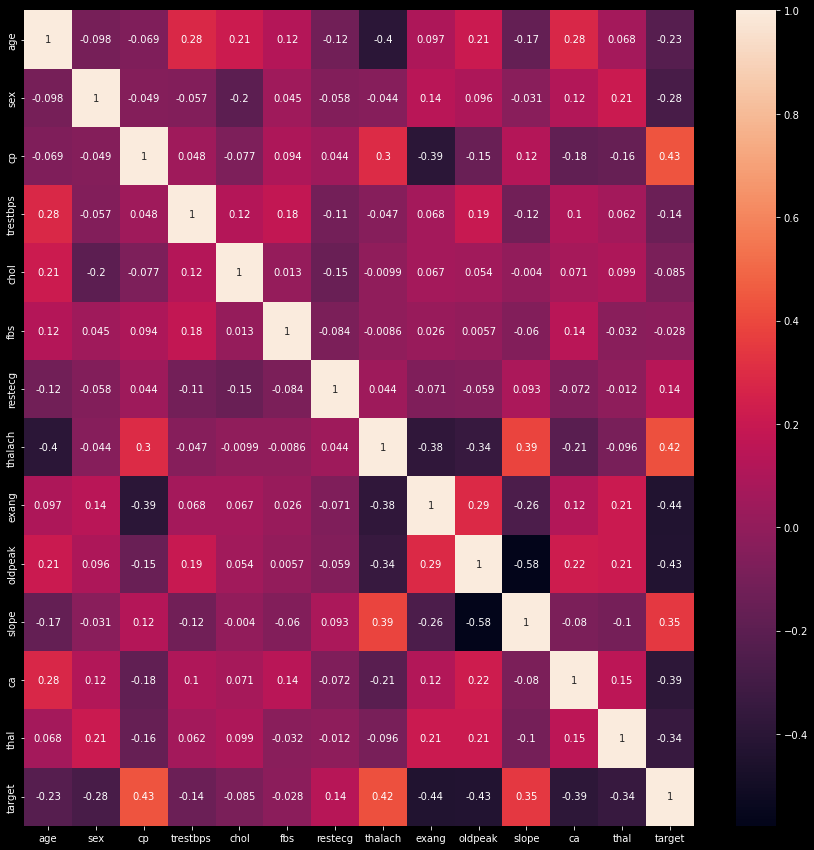

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

### Spliting into Train Test

In [ ]:
np.random.seed(123)
test = data.sample(frac=0.30)
idx = list(test.index)
for i in idx:
    data = data.drop(i)

# Feature Selection

## Visualization

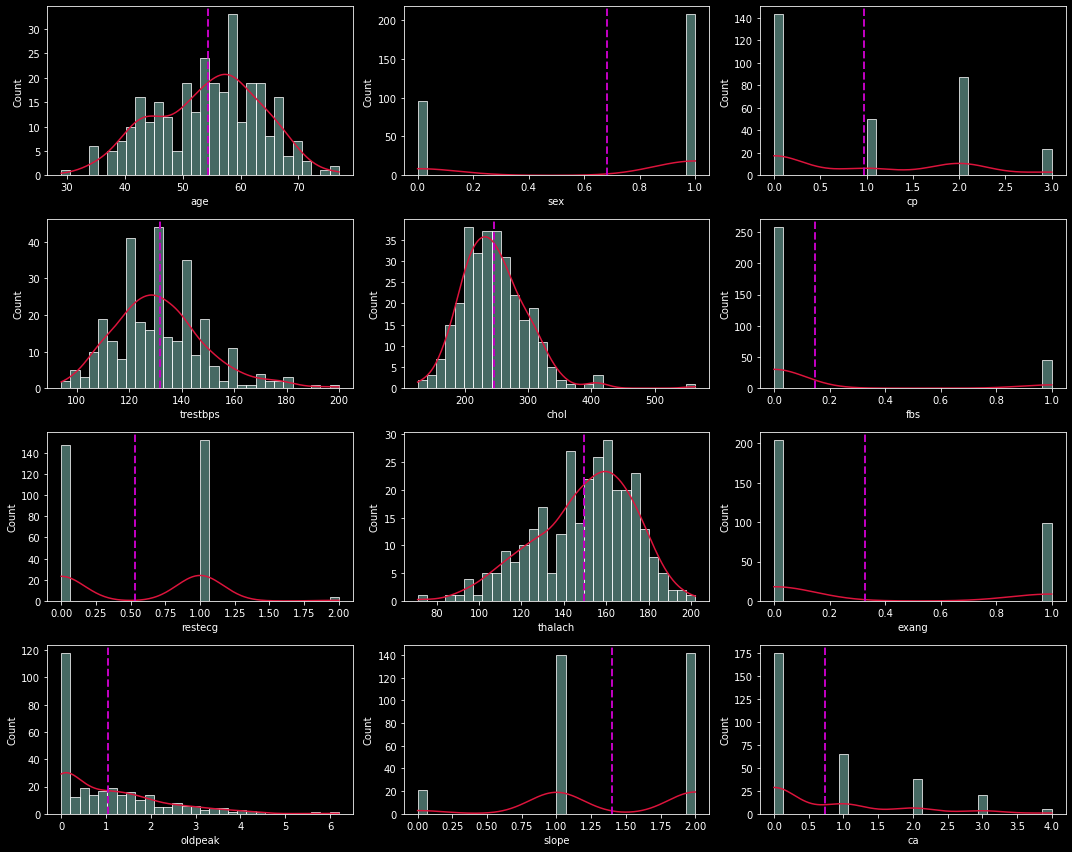

In [ ]:
features = data.drop('target',axis=1)
target = data[['target']]
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
for variable, subplot in zip(features, ax.flatten()):
    g=sns.histplot(data[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

#### From histogram we notice that features that have a distribution not categorized at bins/points are not linearly seprable

#### Features that aren't Linearly Separable

Text(0.5, 1.0, 'Age Vs Ca')

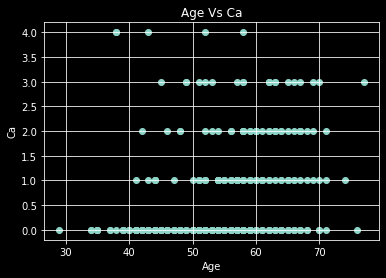

In [ ]:
plt.scatter(x=data['age'],y=data['ca'])
plt.xlabel("Age")
plt.ylabel("Ca")
plt.grid()
plt.title("Age Vs Ca")

Text(0.5, 1.0, 'Age Vs Chol')

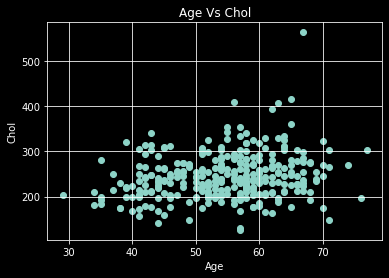

In [ ]:
plt.scatter(x=data['age'],y=data['chol'])
plt.xlabel("Age")
plt.ylabel("Chol")
plt.grid()
plt.title("Age Vs Chol")

Text(0.5, 1.0, 'Thalach Vs Oldpeak')

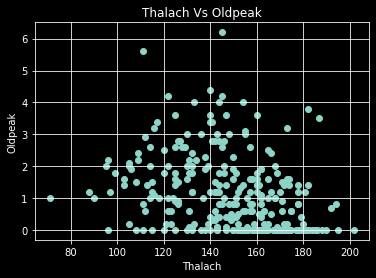

In [ ]:
plt.scatter(x=data['thalach'],y=data['oldpeak'])
plt.xlabel("Thalach")
plt.ylabel("Oldpeak")
plt.grid()
plt.title("Thalach Vs Oldpeak")

Text(0.5, 1.0, 'Thalach Vs Trestbps')

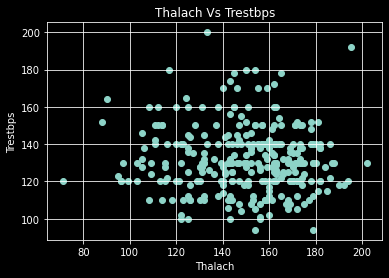

In [ ]:
# trestbps
plt.scatter(x=data['thalach'],y=data['trestbps'])
plt.xlabel("Thalach")
plt.ylabel("Trestbps")
plt.grid()
plt.title("Thalach Vs Trestbps")

Text(0.5, 1.0, 'Thalach Vs Cp')

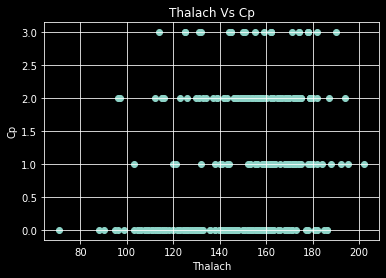

In [ ]:
# cp
plt.scatter(x=data['thalach'],y=data['cp'])
plt.xlabel("Thalach")
plt.ylabel("Cp")
plt.grid()
plt.title("Thalach Vs Cp")

#### Features that are Linearly Separable (Sex, fbs , exang ,restecg , slope , cp)

Text(0.5, 1.0, 'Sex Vs Chol')

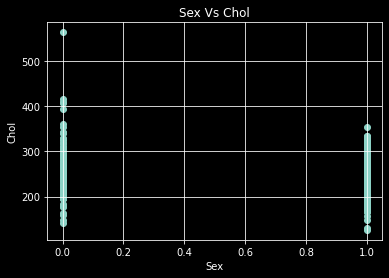

In [ ]:
plt.scatter(x=data['sex'],y=data['chol'])
plt.xlabel("Sex")
plt.ylabel("Chol")
plt.grid()
plt.title("Sex Vs Chol")

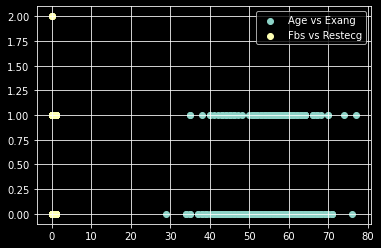

In [ ]:

plt.scatter(data["age"], data["exang"], label = "Age vs Exang")
plt.scatter(data["fbs"], data["restecg"],label = 'Fbs vs Restecg')
plt.legend()
plt.grid()
plt.show()

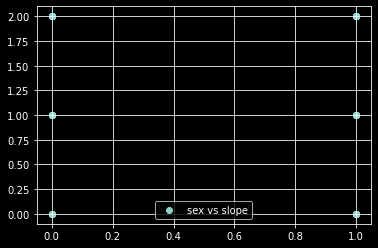

In [ ]:
plt.scatter(data["sex"], data["slope"],label = 'sex vs slope')
plt.legend()
plt.grid()
plt.show()

##### fbs Vs sex

In [ ]:
feature = data[['fbs','sex']]
label = data[['target']]

##### Change Iterations

In [ ]:
iterations = 10
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['fbs','sex']],test['target'],weight) 

print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))


Logistic Regression Info. of target and target:- 
Weight_0 = 0.0004453070912590816
Weight_1 = 1.6466943544183592e-05
Cost/Loss = 0.6931184958767734
Number of Iterations = 10
Accuracy = 61.386138613861384
Accuracy = 10.989010989010989


In [ ]:
iterations = 30
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['fbs','sex']],test['target'],weight) 
print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Train Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Test Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))


Logistic Regression Info. of target and target:- 
Weight_0 = 0.0013343429418616881
Weight_1 = 4.917023938340108e-05
Cost/Loss = 0.6930548540205462
Number of Iterations = 30
Train Accuracy = 54.45544554455446
Test Accuracy = 31.868131868131865


In [ ]:
iterations = 100
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['fbs','sex']],test['target'],weight) 
print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Train Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Test Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))


Logistic Regression Info. of target and target:- 
Weight_0 = 0.00442956652530933
Weight_1 = 0.00016123876613324218
Cost/Loss = 0.6928332013987979
Number of Iterations = 100
Train Accuracy = 54.45544554455446
Test Accuracy = 31.868131868131865


we notice that the more iterations the model make the more generalize it became and in that situation is removes overfitting but after a while it's effect fades away 

##### Change Learning Rate

In [ ]:
iterations = 20
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations,0.1)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['fbs','sex']],test['target'],weight) 
print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Train Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Test Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))

Logistic Regression Info. of target and target:- 
Weight_0 = 0.08068134927735307
Weight_1 = 0.0020990370409463503
Cost/Loss = 0.6876077254409678
Number of Iterations = 20
Train Accuracy = 54.45544554455446
Test Accuracy = 31.868131868131865


In [ ]:
iterations = 20
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations,0.00001)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['fbs','sex']],test['target'],weight) 
print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Train Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Test Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))

Logistic Regression Info. of target and target:- 
Weight_0 = 8.910790745430375e-06
Weight_1 = 3.3001833593078617e-07
Cost/Loss = 0.6931465747159578
Number of Iterations = 20
Train Accuracy = 45.54455445544555
Test Accuracy = 0.0


Here we tried Very big learning rate (step) that leads to a relatively generalized model while when we use a very small learning rate that leads to underfitting  

Slop Vs Sex

In [ ]:
feature = data[['sex','exang']]
label = data[['target']]

In [ ]:
iterations = 10
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['sex','exang']],test['target'],weight) 

print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))


Logistic Regression Info. of target and target:- 
Weight_0 = 0.0006099373864703295
Weight_1 = 0.0017633910995242517
Cost/Loss = 0.6927823703945225
Number of Iterations = 10
Accuracy = 54.71698113207547
Accuracy = 28.57142857142857


In [ ]:
iterations = 30
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['thalach','cp']],test['target'],weight) 
print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Train Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Test Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))


Logistic Regression Info. of target and target:- 
Weight_0 = -0.0010603432757661073
Weight_1 = -0.021351886051491333
Cost/Loss = 2.4247524788521653
Number of Iterations = 30
Train Accuracy = 14.150943396226415
Test Accuracy = 0.0


In [ ]:
iterations = 100
weight, weight_history, costs, hypothesis, loops = logisicRegression(feature,label,iterations)
prediction_train = predict(feature,label, weight)
prediction_test = predict(test[['fbs','sex']],test['target'],weight) 
print("Logistic Regression Info. of {} and {}:- ".format(col_1,col_2))
print("Weight_0 = {}".format(weight[0][0]))
print("Weight_1 = {}".format(weight[1][0]))
print("Cost/Loss = {}".format(costs[loops-1]))
print("Number of Iterations = {}".format(loops))
print("Train Accuracy = {}".format(prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100))
print("Test Accuracy = {}".format(prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100))


Logistic Regression Info. of target and target:- 
Weight_0 = 0.005693158610944855
Weight_1 = 0.0008588396196779441
Cost/Loss = 0.6848255958246923
Number of Iterations = 100
Train Accuracy = 56.132075471698116
Test Accuracy = 31.868131868131865
